Léo QUIGNON
Victor PACHY

## Instructions {-}
Ce sujet est constitué de deux parties : la partie 1 correspond au sujet donné l'an dernier, dont la correction vous est donnée, la partie 2 constitue la partie qui sera évaluée et se place dans la continuité de la partie 1.

# Enoncé du problème (Partie 1)

L'objectif de ce projet est d'estimer la longueur de câble sous-marin nécessaire pour relier deux côtes $A$ et $B$  en utilisant des simulations conditionnelles.


Le câble reposera sur le fond marin dont la profondeur est inconnue.
Le segment $[AB]$ est discrétisé par une séquence de (N+1) points. On pose $x_0=A$ et pour $i=1,\dots,N$, $$x_i=x_0+i\Delta$$ où $$\Delta = \frac{AB}{N}$$ de telle sorte que $x_N=B$.
On note $z(x)$ la profondeur du fond marin au point $x$ de telle sorte 
qu'on pourra estimer la longueur totale de câble nécessaire par la somme 
des longueurs sur les segments de la discrétisation :

$$l=\sum_{i=1}^N\sqrt{\Delta^2+(z(x_i)-z(x_{i-1}))^2}.$$

Enfin, notons que l'on dispose d'un ensemble de $n$ observations de la 
profondeur que l'on supposera situées sur des points de discrétisation $z(x_{j_1}),\dots,z(x_{j_n})$.


On adopte un modèle probabiliste pour la profondeur. On suppose que le vecteur des 
profondeurs sur les points de discrétisation 
$\mathbf{z}=(z(x_0),\dots,z(x_N))$ est la réalisation
d'un vecteur aléatoire gaussien $\mathbf{Z}=(Z(x_0),\dots,Z(x_N))$ 
dont le vecteur d'espérance ne contient qu'une seule valeur $\mu$ 
répétée $N+1$ fois et dont la matrice de covariance $\Sigma$ a pour termes $\sigma_{ij}$
définis par $\sigma_{ij}=C(|x_i-x_j|)$ où $C$ est une
fonction décroissante, traduisant le fait que deux points 
géographiquement proches ont tendance à avoir des profondeurs plus similaires que deux points éloignés.

On supposera que la matrice de covariance ainsi 
générée est définie-positive (en fait, $C$ sera choisie parmi les fonctions qui, 
appliquées aux termes d'une matrice de distance, produisent des matrices définie-positives). 

Si on note $L$ la variable aléatoire donnant la longueur de cable nécessaire : 
$$L=\sum_{i=1}^N\sqrt{\Delta^2+(Z(x_i)-Z(x_{i-1}))^2},$$
un bon estimateur de $L$ est fourni par l'espérance conditionnelle 

$$L^\star=E[L|Z(x_{j_1})=z(x_{j_1}),\dots,Z(x_{j_n})=z(x_{j_n})].$$
                                                                              
Cependant, cette quantité est difficilement accessible par le calcul. 
On va donc avoir recours à des
simulations conditionnelles. C'est-à-dire que l'on va simuler 
un nombre $K$ de réalités (disons des réalisations du modèle 
probabiliste choisi), et sur chacune d'entre elle, 
la quantité de câble nécessaire sera évaluée. 
On disposera ainsi d'un échantillon $l_{(1)},\dots,l_{(K)}$ de 
longueures simulées. Puis on approchera l'espérance conditionnelle  par 
$$L^\star=\frac1{K}\sum_{k=1}^K l_{(k)}.$$

L'objectif de ce projet est donc d'écrire un code permettant 
d'effectuer cette simulation conditionnelle, puis de l'appliquer 
au jeu de données fourni et d'en déduire une estimation de la longueur de câble nécessaire.

## Questions théoriques

1. Quel théorème du cours nous autorise-t-il à estimer l'espérance conditionnelle par la moyenne empirique de simulations conditionnelles ?

*la loi forte des grands nombres, cf [Proba IV p.16](https://boisgera.github.io/CDIS/output/Probabilit%C3%A9%20IV.pdf), en vérifiant que $L$ est bien intégrable*

2. Rappeler la loi conditionnelle du vecteur des composantes de $\mathbf{Z}$ correspondant aux points de discrétisation
sans observation, connaissant les valeurs prises par les composantes aux sites d'observation.

*cf. [Proba III p.18](https://boisgera.github.io/CDIS/output/Probabilit%C3%A9%20III.pdf),*

3. Si $\mathbf{Y}=(Y_1,\dots,Y_p)$ est un vecteur de composantes gaussiennes indépendantes, toutes d'espérance nulle et de variance 1, 
quelle est la loi du vecteur $\mathbf{Z}=m+R\mathbf{Y}$ où $R$ est une matrice $p\times p$ et $m$ est un vecteur de taille $p$ ?

*cf. [Proba V p.12](https://cloud.mines-paristech.fr/index.php/s/GLDwtTAMOJCYk3i/download)*

4. En déduire un algorithme de simulation conditionnelle.

*Appliquer l'algorithme de la q.3 à la loi conditionnelle (on calculera en particulier l'espérance conditionnelle de $\mathbf{Z}$ sachant les données et la décomposition de Cholesky de la matrice de covariance conditionnelle sachant les données).*

## Données du problème
Conventionnellement, $A$ est l'origine, $B=500$, $N=100$.

Les données $$\begin{array}{c|r}i & z(x_i)\\
\hline
0 & 0\\
20 & -4\\
40 & -12.8\\
60 & -1\\
80 & -6.5\\
100 & 0\end{array}$$

L'espérance de chaque composante du vecteur aléatoire $\mathbf{Z}$ est donnée par $\mu=-5.$

La fonction $C$ est définie par $$C(h)=\sigma^2 e^{-|h|/a},$$

où $|h|$ correspond à la distance entre deux points, $a=50$ et $\sigma^2=12$.


## Implémentation

### Préambule

In [27]:
#Chargement de dépendances

import numpy as np
import matplotlib.pyplot as plt

#Discrétisation
A=0
B=500
N=101 #Nombre de points de discrétisation
Delta = (B-A)/(N-1)
discretization_indexes = np.arange(N)
discretization = discretization_indexes*Delta
#Paramètres du modèle

mu=-5
a = 50
sigma2 = 12

#Données

observation_indexes = [0,20,40,60,80,100]
depth = np.array([0,-4,-12.8,-1,-6.5,0])

#Indices des composantes correspondant aux observations et aux componsantes non observées

unknown_indexes=list(set(discretization_indexes)-set(observation_indexes))


### Questions

1. Ecrire une fonction qui prend en argument la distance entre les points, le paramètre $a$, et le paramètre $\sigma^2$, et qui retourne la covariance entre deux points.
On pourra fournir une matrice de distance à cette fonction. Dans ce cas, la fonction renverra la matrice de covariance.

In [28]:
#Fonction C

def Covexp(dist,rangeval,sigmaval):
    return sigmaval * np.exp(-dist/rangeval)


2. Calculer la matrice de distance.

In [29]:
distmat=abs(np.subtract.outer(discretization,discretization))

3. Calculer la matrice de covariance du vecteur $\mathbf{Z}=(Z(x_0),\dots,Z(x_N))$.

In [30]:
Sigma=Covexp(distmat,a,sigma2)

4. Extraire les 3 matrices de covariance suivantes :

 * entre les observations

 * entre les observations et les inconnues

 * entre les inconnues


In [31]:
SigmaObs = Sigma[observation_indexes,:][:,observation_indexes]
SigmaObsUnknown = Sigma[observation_indexes,:][:,unknown_indexes]
SigmaUnknown = Sigma[unknown_indexes,:][:,unknown_indexes]
SigmaUnknown

array([[1.20000000e+01, 1.08580490e+01, 9.82476904e+00, ...,
        8.12744838e-04, 7.35401941e-04, 6.65419193e-04],
       [1.08580490e+01, 1.20000000e+01, 1.08580490e+01, ...,
        8.98221959e-04, 8.12744838e-04, 7.35401941e-04],
       [9.82476904e+00, 1.08580490e+01, 1.20000000e+01, ...,
        9.92688787e-04, 8.98221959e-04, 8.12744838e-04],
       ...,
       [8.12744838e-04, 8.98221959e-04, 9.92688787e-04, ...,
        1.20000000e+01, 1.08580490e+01, 9.82476904e+00],
       [7.35401941e-04, 8.12744838e-04, 8.98221959e-04, ...,
        1.08580490e+01, 1.20000000e+01, 1.08580490e+01],
       [6.65419193e-04, 7.35401941e-04, 8.12744838e-04, ...,
        9.82476904e+00, 1.08580490e+01, 1.20000000e+01]])

5. Calculer l'espérance conditionnelle des composantes non observées connaissant les observations et la représenter avec les données.

In [32]:
invSigma = np.linalg.inv(SigmaObs) 
Ec= mu+np.matmul(np.transpose(SigmaObsUnknown),np.matmul(np.linalg.inv(SigmaObs),depth-mu))

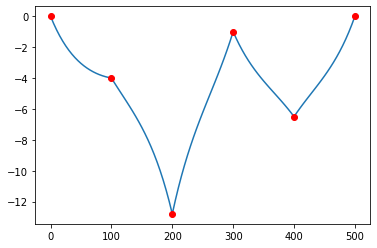

In [33]:
allval1 = np.zeros(N)
allval1[unknown_indexes]=Ec
allval1[observation_indexes]=depth
plt.plot(discretization,allval1)
plt.plot(discretization[observation_indexes], depth, 'ro')
plt.show()

6. Calculer la matrice de variance conditionnelle et tracer sa diagonale (variance conditionnelle) en fonction de la position. Commenter.

In [34]:
SigmaCond = SigmaUnknown - np.matmul(np.transpose(SigmaObsUnknown),np.matmul(np.linalg.inv(SigmaObs),SigmaObsUnknown))

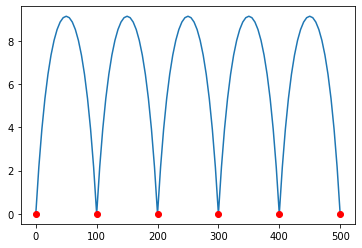

In [35]:
allval2 = np.zeros(N)
allval2[unknown_indexes]=np.diag(SigmaCond)
plt.plot(discretization,allval2)
plt.plot(discretization[observation_indexes], np.zeros(np.shape(observation_indexes)[0]), 'ro')
plt.show()

*On voit ici que la variance est nulle aux points de données (puisque la valeur est fixée) puis qu'elle augmente lorsqu'on s'éloigne des données*

7. Effectuer une simulation conditionnelle. Sur un même graphique, tracer la simulation ainsi que les données et l'espérance conditionnelle. Commenter.

In [36]:
Cholesky = np.linalg.cholesky(SigmaCond)
x = np.random.normal(0,1,np.shape(unknown_indexes)[0])
simu = Ec + np.matmul(Cholesky,x)

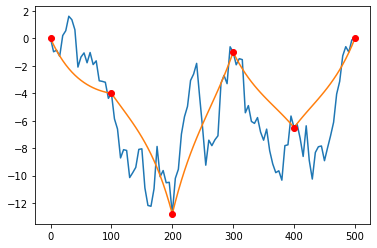

In [37]:
allval3 = np.zeros(N)
allval3[unknown_indexes]=simu
allval3[observation_indexes]=depth
plt.plot(discretization,allval3)
plt.plot(discretization,allval1)
plt.plot(discretization[observation_indexes], depth, 'ro')
plt.show()

*l'espérance conditionnelle est lisse car c'est la fonction des données qui minimise la variance ; la simulation conditionnelle reproduit les fluctuations du modèle et donc l'aspect du fond marin*

8. Ecrire une fonction qui calcule la longueur du câble en fonction du vecteur des profondeurs et du pas de discrétisation.

In [38]:
def length(z,delta):
    return sum(np.sqrt(Delta**2+(z[1:N]-z[0:-1])**2))

9. Utiliser cette fonction pour calculer la longueur du câble à partir de 100 simulations. Comparer l'espérance conditionnelle (estimée) de la longueur avec la longueur de l'espérance conditionnelle.

In [39]:
K=10000
result = np.zeros(K)
for i in range(K):
    x=np.random.normal(0,1,np.shape(unknown_indexes)[0])
    allval3[unknown_indexes]=Ec + np.matmul(Cholesky,x)
    result[i]=length(allval3,Delta)


In [40]:
sum(result)/K

522.4695418840485

In [41]:
length(allval1,Delta)

501.6468416918411

*On donne ici directement les résultats pour 100000 simulations (comparer la vitesse d'éxécution avec votre code pour voir l'intérêt de la vectorisation).*

*On voit ici que la longueur donnée par l'espérance conditionnelle est bien moindre que la longueur d'une simulation conditionnelle. Ceci est dû au fait que la simulation conditionnelle va reproduire les fluctuations attendues, au contraire de l'espérance conditionnelle qui minimise la variance.*

*NB : On remarquera que c'est le seul endroit où on a utilisé une boucle dans cette correction. On aurait pu s'en passer en utilisant notamment les outils de la librairie Pandas mais le code est plus lisible ainsi.*

10. Représenter la suite $M_n$ des moyennes des longueurs de câbles en fonction du nombre de simulations. Commenter.

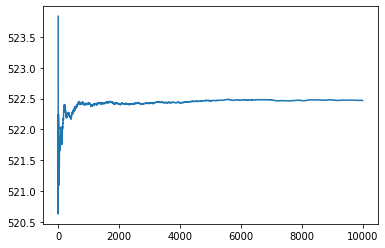

In [42]:
indice_simu = 1+np.arange(K)
plt.plot(indice_simu,np.cumsum(result)/indice_simu)
plt.show()

*Comme attendu d'après la LFGN, on observe une stabilisation de la valeur moyenne. Les variations sont imperceptibles après quelques dizaines de milliers de simulations*

11. Représenter l'histogramme des longueurs de câbles générées.

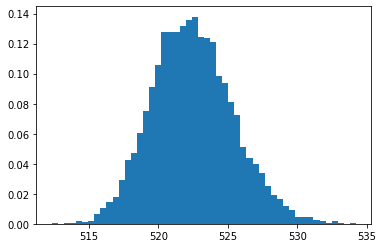

In [43]:
plt.hist(result,50,density=True)
plt.show()

*L'histogramme ressemble à une densité gaussienne, avec néanmoins une légère dissymétrie (plus de valeurs fortes).*

12. Donner un intervalle de confiance à 95% de la longueur du câble par 2 méthodes différentes. Commenter.

*1ère méthode : par approximation gaussienne. L'histogramme précédent suggère qu'une loi gaussienne peut bien représenter la loi conditionnelle de la longueur du cable. On obtient un intervalle de confiance en calculant la moyenne (milieu de l'intervalle) et l'écart type de l'échantillon de longueurs de câble puis en appliquant la formule du cours.*

In [44]:
Ln = sum(result)/K
sigman = np.std(result)
[Ln - sigman*1.96,Ln + sigman*1.96]

[516.7561801481934, 528.1829036199035]

*2e méthode : on extrait les quantiles à 2.5% et 97.5% de l'échantillon, c'est-à-dire les valeurs $x_\alpha$ pour $\alpha \in \{0.025 ; 0.975\}$telles que* $$\mathbb{P}(L<x_\alpha) \approx \frac{1}{n}\sum_{i=1}^N 1_{\{L_i<x_\alpha\}}$$

In [45]:
np.quantile(result,[0.025,0.975])

array([517.15790032, 528.58059456])

*ATTENTION : ici l'utilisation du TCL tel qu'exposé au début du chapitre 5 fournissait un intervalle de confiance de l'**espérance de la longueur de câble** et non de la **longueur de câble** (erreur fréquente).*

*On voit par ailleurs que la 2e méthode est plus précise car elle est basée directement sur la loi empirique de l'échantillon*

13. Donner une estimation de la probabilité que la longueur du câble dépasse 525 m.

In [46]:
np.mean(result>525)

0.1888

14. Reprendre les questions précédentes avec 1000, 10000 puis 100000 simulations. Commenter

*cf. le commentaire de la question 10. On observe une stabilisation progressive des estimateurs des différentes quantités calculées : moyennes, quantiles, probabilité de dépassement de seuil.*

# Enoncé 2021 (Partie 2)

Nous nous plaçons dans le même cadre que ci-dessus. Nous tenons pour acquis les résultats précédents et allons maintenant approfondir l'analyse.

## Valeurs positives

*1. A la question 7 de la partie 1, on peut s'apercevoir que certains profils de profondeur présentent des valeurs positives, ce qui n'a pas de sens si on considère qu'il n'y a pas de partie émergée entre les deux côtes. Proposer et implémenter un algorithme de type rejet qui ne génèrera que des valeurs négatives. Représenter un profil de profondeur généré.*

On implémente un algorithme qui calcule un profil de profondeurs et qui, si une des valeurs est positive, le rejette et ce jusqu'à ce qu'il n'y ait que des valeurs négatives.

In [47]:
def negative_depths(Ec):
    Cholesky = np.linalg.cholesky(SigmaCond)
    x = np.random.normal(0,1,np.shape(unknown_indexes)[0])
    simu = Ec + np.matmul(Cholesky,x)
    
    while np.any(simu > 0):
        x = np.random.normal(0,1,np.shape(unknown_indexes)[0])
        simu = Ec + np.matmul(Cholesky,x)
    
    return simu

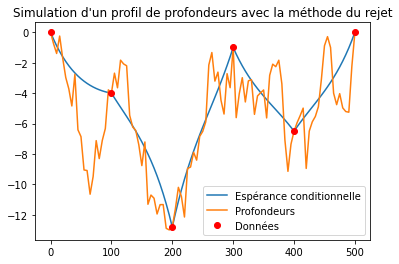

In [48]:
allval3 = np.zeros(N)
allval3[unknown_indexes]=negative_depths(Ec)
allval3[observation_indexes]=depth

plt.plot(discretization, allval1, label="Espérance conditionnelle")
plt.plot(discretization, allval3, label="Profondeurs")
plt.plot(discretization[observation_indexes], depth, 'ro', label = "Données")
plt.legend()
plt.title("Simulation d'un profil de profondeurs avec la méthode du rejet")

plt.show()

*2. L'emploi de cet algorithme a-t-il un impact sur la valeur moyenne de la longueur de câble ? Sur l'histogramme des longueurs de câble ? Sur l'intervalle de confiance obtenu par la méthode des quantiles ? Sur la probabilité de dépassement du seuil de 525 m? Donner une estimation du taux de rejet de l'algorithme. Considérer 10000 simulations.*

In [49]:
K=10000
result_2 = np.zeros(K)
for i in range(K):
    x=np.random.normal(0,1,np.shape(unknown_indexes)[0])
    allval3[unknown_indexes] = negative_depths(Ec)
    result_2[i]=length(allval3,Delta)

In [50]:
sum(result_2)/K

521.7894247955461

La veleur mpyenne est inférieure à celle trouvée précédemment, ce qui fait sens car on a enlevé les valeurs positives.  
On trace l'histogramme des deux méthodes (avant et après l'utilisation de $negative$_$depths$) pour savoir si elle a un impact sur la répartition des valeurs.

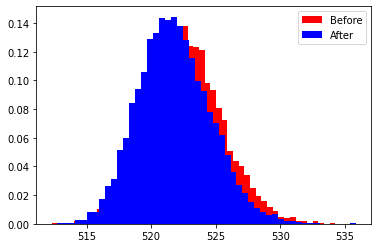

In [51]:
plt.hist(result, 50, density=True, color='r')
plt.hist(result_2, 50, density=True, color='b')
plt.legend(['Before', 'After'])
plt.show()

On constate que l'on a toujours une gaussienne de valeur moyenne légèrement inférieure (comme vu précédemment).

In [52]:
np.quantile(result_2, [0.025, 0.975])

array([516.69420687, 527.62062504])

De la même manière, les résultats pour le quantile nous donne un ensemble de valeurs légèrement décalé vers la gauche.

In [53]:
np.mean(result > 525), np.mean(result_2 > 525)

(0.1888, 0.1321)

Concernant le seuil, on constate que la valeur diminue. Cela s'explique par le fait que les valeurs ne sont pas supposées être plus profondes alors qu'on a éliminé celles dépassant la surface de l'eau. 

Enfin, calculons le taux de rejet.

In [54]:
def nombre_rejets(Ec):
        compteur = 0
        
        Cholesky = np.linalg.cholesky(SigmaCond)
        x = np.random.normal(0,1,np.shape(unknown_indexes)[0])
        simu = Ec + np.matmul(Cholesky,x) #Une première valeur de simu

        while np.any(simu > 0): #On recalcule simu tant qu'il y a des points au-dessus de la surface
            x = np.random.normal(0,1,np.shape(unknown_indexes)[0])
            simu = Ec + np.matmul(Cholesky,x)

            compteur += 1

        return compteur

In [55]:
K = 1000
estimations = np.zeros(K)
for i in range(K):
    estimations[i] = nombre_rejets(Ec)

In [56]:
sum_profils_rejetes = np.sum(estimations)
sum_profils = sum_profils_rejetes + K
print(sum_profils_rejetes/sum_profils)

0.9615650703359213


Le taux de rejet est très élevé. Cela s'explique par le fait que même si la probabilité d'avoir une valeur positive lors du calcul du profil est très faible, il suffit d'une seule valeur pour devior recalculer l'ensemble du profil.  
Le taux obtenu semble donc cohérent avec la méthode utilisée.

## Approche Bayésienne

Dans la première partie, on a considéré que l'ensemble des paramètres du modèle était parfaitement connu. Toutes choses égales par ailleurs, on va maintenant considérer que la moyenne $\mu$ est issue d'une estimation entâchée d'une incertitude. Plus précisément, on va modéliser cette incertitude en considérant que $\mu \sim \mathcal{N}(-5,4)$.

On va également décomposer le vecteur $\mathbf{Z}$ en $\mathbf{Z} = (\mathbf{Z}_{\text{OBS}},\mathbf{Z}_{\text{UNK}})$. On notera $C_{\text{OBS}}$ et $C_{\text{UNK}}$ les matrices de covariance respectives de $\mathbf{Z}_{\text{OBS}}$ et $\mathbf{Z}_{\text{UNK}}$ ainsi que $C_{\text{OBS},\text{UNK}}$ la matrice des covariances entre ces deux vecteurs.

### Questions théoriques

*3. Montrer que $\mu | \mathbf{Z}_{\text{OBS}}= \mathbf{z}_{\text{OBS}} \sim \mathcal{N}(\widehat{\mu},\widehat{\sigma}^2)$ avec*
$$\widehat{\sigma}^2 = (\mathbf{1}^t C_{\text{OBS}}^{-1} \mathbf{1} + \frac1{4})^{-1},$$ 
*où $\mathbf{1}$ est un vecteur de longueur 6 (soit la longueur du vecteur $\mathbf{Z}_{\text{OBS}}$) ne contenant que des 1 et 
$$\widehat{\mu} = \widehat{\sigma}^2 (\mathbf{1}^t C_{\text{OBS}}^{-1} \mathbf{z}_{\text{OBS}} - \frac{5}{4} )$$
Indication : écrire la densité jointe du vecteur $(\mathbf{Z}_{\text{OBS}},\mu)$, calculer $-2 \ln$ de cette densité puis identifier la forme quadratique faisant intervenir $\mu$.*

**Réponse**  
  
On commence par exprimer la densité du couple $(\mathbf{Z}_{obs}, \mu)$.  
On a :
$$
f_{(\mathbf{Z}_{OBS}, \mu)}(z, m) = f_\mu(m) \times f_{\mathbf{Z}_{OBS} | \mu = m }(z)
= \frac{1}{2\sqrt{2\pi}}exp(-\frac{(m+5)^2}{8}) \times \frac{1}{(\sqrt{2\pi})^6}\frac{1}{\sqrt{det(C_{OBS})}}exp(-\frac{1}{2}(z-\mathbf{1}m)^T{C_{OBS}}^{-1}(z-\mathbf{1}m))
$$
On prend $-2ln$ de cette quantité et on note $A$ le résultat.

$$
A = 7ln(2\pi) + ln(4det(C_{OBS})) + \frac{(m + 5)^2}{16} + (z - \mathbf{1}m)^T{C_{OBS}}^{-1}(z - \mathbf{1}m)
$$
$C_{OBS}$ est symétrique donc ${C_{OBS}}^{-1}$ aussi et $({C_{OBS}}^{-1})^T = ({C_{OBS}}^T)^{-1}$.  
On peut écrire 
$$
(z - \mathbf{1}m)^T{C_{OBS}}^{-1}(z - \mathbf{1}m) = z^T{C_{OBS}}^{-1}z - m\mathbf{1}^T{C_{OBS}}^{-1}z -mz^T{C_{OBS}}^{-1}\mathbf{1} + m^2\mathbf{1}^T{C_{OBS}}^{-1}\mathbf{}1 \\ 
= m^2\mathbf{1}^T{C_{OBS}}^{-1}\mathbf{1} + z^T
(z - \mathbf{1}m)^T{C_{OBS}}^{-1}(z - \mathbf{1}m)  \\
= z^T{C_{OBS}}^{-1}z - m\mathbf{1}^T{C_{OBS}}^{-1}z -mz^T{C_{OBS}}^{-1}\mathbf{1} + m^2\mathbf{1}^T{C_{OBS}}^{-1}\mathbf{1} \\
= m^2 \mathbf{1}^T{C_{OBS}}^{-1}\mathbf{1} + z^T{C_{OBS}}^{-1}z -2m\langle \mathbf{1}, {C_{OBS}}^{-1}z \rangle
$$
D'où :
$$
A = 7ln(2\pi) + ln(4det(C_{OBS})) + z^T{C_{OBS}}^{-1}z + 25/4 + m^2(\frac{1}{4} + 1^T{C_{OBS}}^{-1}1) - 2m(\langle 1, {C_{OBS}}^{-1}z \rangle - \frac{5}{4})
$$

Mais on peut aussi écrire $f_{(\mathbf{Z}_{OBS}, \mu)}(z, m) = f_\mathbf{{Z}_{OBS}}(z) \times f_{\mu | \mathbf{Z}_{OBS} = z}(m)$.

On raisonne par analyse synthèse pour retrouver la loi $f_{\mu | Z_{OBS} = z}$.    
  
    
**Analyse**  
Supposons tout d'abord que $\mu | {Z}_{OBS}= z \sim \mathcal{N}(\widehat{\mu},\widehat{\sigma}^2)$.

On a 
$$
-2ln(f_{\mu | Z_{OBS} = z}(m)) = 2ln(\sqrt{2\pi}\widehat{\sigma})+\frac{(m-\widehat{\mu})^2}{\widehat{\sigma}^2} = m^2\frac{1}{\widehat{\sigma}^2} - m\frac{2\widehat{\mu}}{\widehat{\sigma}^2} + (2ln(\sqrt{2\pi}\widehat{\sigma})+ \frac{\widehat{\mu}^2}{\widehat{\sigma}^2})
$$
Cela nous donne par unicité de la décomposition avec la formule $A$ trouvée précédemment :
$$
{\widehat{\sigma}^2}=({\mathbf{1}^TC_{OBS}^{-1}\mathbf{1} + \frac{1}{4}})^{-1}
$$
et
$$
\widehat{\mu}=\widehat{\sigma}^2(\mathbf{1}^T C_{OBS}^{-1}z_{OBS} - \frac{5}{4})
$$
**Synthèse**  
Si on a $\widehat{\sigma}^2$ et $\widehat{\mu}$ avec ces valeurs, on trouve
$$
A = 2ln(\sqrt{2\pi}\widehat{\sigma}) + \frac{1}{\widehat{\sigma^2}}(m^2 -2m\widehat{\mu} + \widehat{\mu}^2) + g(z_{OBS})
$$
où $g(z_{OBS})$ comprend tous les termes ne dépendant que de cette variable.  
On a $exp(-\frac{A}{2}) = f_{\mu | \mathbf{Z}_{OBS} = z}(m) \times f_{Z_{OBS}}(z)$.  
  
$f_{\mu | \mathbf{Z}_{OBS} = z}(m) \times f_{Z_{OBS}}(z) = \frac{1}{\sqrt{2\pi}\widehat{\sigma}}exp(-\frac{(m - \widehat{\mu})^2}{2\widehat{\sigma}^2})exp(-\frac{g(z_{OBS})}{2})$. On reconnait le produit d'une loi normale et d'une fonction ne dépendant que de $z_{OBS}$. On a bien le résultat escompté, $\mu$ suit une loi normale de paramètres $(\widehat{\mu}, \widehat{\sigma}^2)$.

*4. Montrer que si $X$, $Y$ et $Z$ sont trois vecteurs aléatoires à densité, alors $f_{X,Y|Z = z}(x,y) = f_{X|Y=y,Z=z}(x)f_{Y|Z=Z}(y)$*

On considère $X, Y, Z$ des variables aléatoires admettant toutes 3 des densités.
Posons $A = (X, Y)$.$A, Z$ admet une densité telle que :    
$$
f_{A, Z}(x, y, z) = f_Z(z) \times f_{A | Z = z}(x, y) $$
Posons maintenant $B = (Y, Z)$.   
  
$X, B$ admet aussi une densité et :  
$$
f_{X, B}(x, y, z) = f_{X | B = y, z}(x) \times f_B(y, z) = f_{X | B = (y, z)}(x) \times f_{Y | Z = z}(y) \times f_Z(z)
$$  
  
Comme on a $f_{X, Y, Z}(x, y, z) = f_{A, Z}(x, y, z) = f_{X, B}(x, y, z)$, on trouve bien :
  
    
$$
f_{(X, Y) | Z = z}(x, y) = f_{X | (Y, Z) = (y, z)}(x) \times f_{Y | Z = z}(y)
$$

*5. En déduire que la densité de $(\mathbf{Z}_{\text{UNK}},\mu) | \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}}$ s'écrit comme le produit de $f_{\mu | \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}}}$ et de $f_{\mathbf{Z}_{\text{UNK}}| \mu = \mu^\star, \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}}}$ que l'on exprimera.*

Indication : $f_{\mathbf{Z}_{\text{UNK}}| \mu = \mu^\star, \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}}}$ est identique à la densité $f_{\mathbf{Z}_{\text{UNK}}| \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}}}$ utilisée dans la partie 1 avec $\mu = \mu^\star$

$\mu, Z_{OBS}$ et $Z_{UNK}$ admettent toutes 3 des densités. D'après la question précédente, on peut écrire :  
  
  
$$
f_{(Z_{UNK}, \mu) | Z_{OBS} = z_{OBS}}(z_u, \mu^\star) = f_{Z_{UNK} |\mu = \mu^\star, Z_{OBS} = z_{OBS}}(z_u) \times f_{\mu | Z_{OBS} = z_{OBS}}(\mu^\star)
$$  
  
  
En se servant de l'indication, on connait l'expression de $f_{Z_{UNK} |\mu = \mu^\star, Z_{OBS} = z_{OBS}}$ :  
  
  
$$
f_{Z_{UNK}|\mu=\mu^\star,Z_{OBS}=z_{OBS}}(z_u)= \frac{1}{(2\pi)^{(N-6)/2}\sqrt{det(CS_{UNK})}}exp(-\frac{1}{2}(z_u-\psi(z))^TCS_{UNK}^{-1}(z_u-\psi(z))))
$$
Avec :  
$\psi(z)=(\mu^\star+CC_{OBS}^{-1}(z-\mu^\star))$  
  
$CS_{UNK}=C_{UNK}-C_{UNK,Z}C_Z^{-1}C_{Z,UNK}$

Et $f_{\mu|Z_{OBS}=z_{OBS}}(\mu^\star) = \frac{1}{\sqrt{2\pi}\widehat{\sigma}}exp(-\frac{(\mu^\star-\widehat{\mu})^2}{2\widehat{\sigma}^2})$ d'après la question $3$.

### Simulation

On va maintenant chercher à simuler les valeurs de $\mathbf{Z}_{\text{UNK}}$ en tenant compte de l'incertitude sur $\mu$.

En première approche, on pourrait chercher à obtenir la densité de $\mathbf{Z}_{\text{UNK}} | \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}}$ en calculant 
$$\int_\mathbb{R} f_{(\mathbf{Z}_{\text{UNK}},\mu) | \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}}}(\mathbf{z}_{\text{UNK}},\mu^\star) d\mu^\star$$
mais ce calcul a peu de chances d'aboutir.

On va plutôt procéder par simulations en cascade, c'est-à-dire que pour chaque simulation de $\mathbf{Z}_{\text{UNK}}$, on va d'abord générer une valeur $\mu^\star$ de $\mu$ selon $f_{\mu | \mathbf{Z}_{\text{OBS}}= \mathbf{z}_{\text{OBS}}}$ puis on simulera $\mathbf{Z}_{\text{UNK}}$ selon $f_{\mathbf{Z}_{\text{UNK}}| \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}},\mu = \mu^\star}$.


*6. Calculer $\widehat{\mu}$ et $\widehat{\sigma}^2$.*

In [57]:
var_circ = np.linalg.inv(np.matmul(np.ones((1, 6)), np.matmul(np.linalg.inv(SigmaObs), np.ones((6, 1)))) + 1/4)
mu_circ = np.matmul(var_circ, np.matmul(np.ones((1, 6)), np.matmul(np.linalg.inv(SigmaObs), depth))) - 5/4

float(var_circ), float(mu_circ)

(1.5368909974762894, -3.6202365840884103)

*7. Calculer la probabilité de $\{\mu| \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}} > 0\}$. Proposer et implémenter un algorithme de simulation de $\mu| \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}}, \mu <0$.*

On a $\mu | {Z}_{OBS}= z \sim \mathcal{N}(\widehat{\mu},\widehat{\sigma}^2)$. Ainsi,
$$
\mathbb{P}(\mu | {Z}_{OBS}= z > 0) = 1 - \mathbb{P}(\mu | {Z}_{OBS}= z_{OBS} \leq 0) = 1 - \int_{-\infty}^0f_{\mu | Z_{OBS} = z_{OBS}}(m) \mathrm{d}m = 1 - \int_{-\infty}^0 \frac{1}{\sqrt{2\pi}\widehat{\sigma}}exp(-\frac{(m-\widehat{\mu})^2}{2\widehat{\sigma}^2}) \mathrm{d}m
$$
On effectue alors le changement de variable :  $u = \frac{m-\widehat{\mu}}{\sqrt{2}\widehat{\sigma}}$. En différentiant l'égalité, on obtient : $\mathrm{d}u = \frac{\mathrm{d}m}{\sqrt{2}\widehat{\sigma}}$.
Ainsi, le calcul de la probabilité devient :  
$$
\mathbb{P}(\mu | {Z}_{OBS}= z > 0) = 1 - \int^{-\frac{\widehat{\mu}}{\sqrt{2}\widehat{\sigma}}}_{-\infty} \frac{1}{\sqrt{\pi}}exp(-u^2) \, \mathrm{d}u = \int_{-\frac{\widehat{\mu}}{\sqrt{2}\widehat{\sigma}}}^{+\infty} \frac{1}{\sqrt{\pi}}exp(-u^2) \, \mathrm{d}u
$$
On utilise la fonction $quad$ de la librairie $scipy.integrate$ pour trouver le résultat de cette intégrale.

In [58]:
from scipy.integrate import quad

def f(u):
    return np.exp(-u**2)/(np.pi)**0.5

valeur_inf = -float(mu_circ)/((2*float(var_circ))**1/2)

print(f"P(mu|Zobs=zobs>0) = {quad(f, valeur_inf, np.inf)[0]}")

P(mu|Zobs=zobs>0) = 0.0004322648489260951


On utilise maintenant $np.random.normal (\mu, \sigma^2)$ qui simule des valeurs pour une loi normale de distribution $(\mu, \sigma^2)$ pour implémenter la fonction demandée.

In [59]:
def simu_mu_sachant_Z_obs():
    mu = np.random.normal(float(mu_circ), np.sqrt(var_circ))
    
    while mu >= 0:
        mu = np.random.normal(mu_circ, np.sqrt(var_circ))
        
    return float(mu)


*8. Générer un couple $\mathbf{Z}_{\text{UNK}}, \mu| \mathbf{Z}_{\text{OBS}}, \mu <0$ et représenter le profil de profondeur obtenu. On prendra soin de ne générer que des valeurs négatives de $\mathbf{Z}_{\text{UNK}}$ en utilisant l'algorithme de la section précédente.*

In [60]:
def esp_cond(mu):
    return mu + np.matmul(np.transpose(SigmaObsUnknown), np.matmul(np.linalg.inv(SigmaObs), depth - mu))

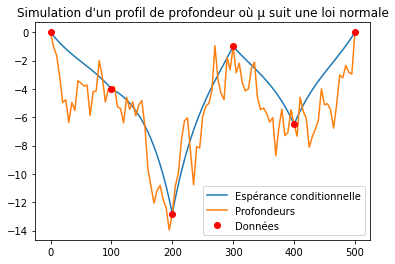

In [61]:
mu_star = simu_mu_sachant_Z_obs()

Ec = esp_cond(mu_star)

allval5 = np.zeros(N)
allval5[unknown_indexes] = Ec
allval5[observation_indexes] = depth

allval6 = np.zeros(N)
allval6[unknown_indexes] = negative_depths(Ec)
allval6[observation_indexes] = depth

plt.plot(discretization, allval5, label="Espérance conditionnelle")
plt.plot(discretization, allval6, label="Profondeurs")
plt.plot(discretization[observation_indexes], depth, 'ro', label = "Données")
plt.legend()
plt.title("Simulation d'un profil de profondeur où µ suit une loi normale")
plt.show()

*9. Générer 10000 profils de profondeur et calculer les longueurs de câble associées. Comparer la valeur moyenne de la longueur de câble, dont on visualisera la convergence, l'histogramme des longueurs de câble, l'intervalle de confiance obtenu par la méthode des quantiles, la probabilité de dépassement du seuil de 525 m avec les résultats obtenus précédemment. Commenter.*

On reprend la trame présentée dans la correction de la partie 1.

In [62]:
K = 10000
cable_lengths = np.zeros(K)

for i in range(K):
    
    mu_star = simu_mu_sachant_Z_obs()
    Ec = esp_cond(mu_star)

    allval = np.zeros(N)
    allval[unknown_indexes] = negative_depths(Ec)
    allval[observation_indexes] = depth
    
    cable_lengths[i] = length(allval, Delta)


On peut déduire des données obtenues la valeur moyenne des longueurs de câble.

In [63]:
print(sum(cable_lengths)/K)

521.6498397290941


On retrouve quasiment la même moyenne qu'au début de l'énonce (521.7).

Pour calculer la vitesse de convergence, on trace les  moyennes cumulées.

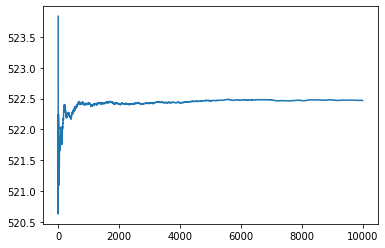

In [64]:
indice_simul = 1 + np.arange(K)
plt.plot(indice_simul, np.cumsum(result)/indice_simu)
plt.show()

Le schéma se comporte sensiblement comme le précédent, avec une convergence rapide vers la moyenne.

On a ici l'histogramme des résultats.

<function matplotlib.pyplot.show(close=None, block=None)>

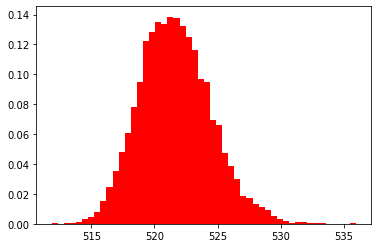

In [65]:
plt.hist(cable_lengths, 50, density=True, color='r')
plt.show

Pour comparer les 2 schémas, on superpose les histogrammes :

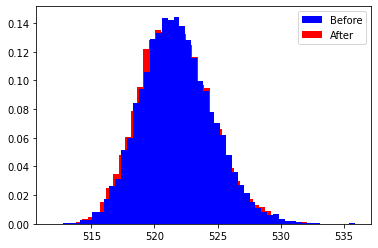

In [66]:
plt.hist(result_2, 50, density=True, color='b')
plt.hist(cable_lengths, 50, density=True, color='r')
plt.hist(result_2, 50, density=True, color='b')
plt.legend(['Before', 'After'])
plt.show()

On constate ainsi que les 2 sont presque identiques et mais que les valeurs avec le nouveau schéma sont plus resserrées autour de la moyenne.

In [67]:
np.quantile(cable_lengths, [0.025, 0.975])

array([516.60036579, 527.66815225])

In [68]:
np.mean(cable_lengths > 525)

0.1191

Le quantile garde les mêmes valeurs qu'en partie 1 ([516.485, 527.607]), tout comme la moyenne de dépassement de seuil (0.1273) au moins au $100^e$ près.

*10. Qu'adviendrait-il selon vous si on rendait également aléatoires les autres paramètres du modèle $\sigma^2$ et $a$ ?*

L'étude réalisée dans la deuxième partie qui permet a $\mu$ de fluctuer selon une loi normale nous a montré que les résultats ne variaient pas significativement lorsque qu'on rend aléatoire un paramètre de la loi de distribution. On peut donc supposer que faire varier $\sigma^2$ aura la même influence que vu précédemment.  
  
$a$ se situe dans le terme en exponentielle de la fonction $C$. Le faire varier va donc modifier la fonction $C$ qui traduit la différence de profondeur entre 2 points successifs de la distribution. Faire varier $a$ modifiera probablement de manière plus importante les profils.